# Introducing the MAGIC Gamma Telescope Emission Classifier: Decoding Celestial Signals with Machine Learning



In the realm of cutting-edge astrophysics and data science, the utilization of advanced machine learning techniques has opened unprecedented avenues for understanding the cosmos. The MAGIC Gamma Telescope Emission Classifier represents a remarkable fusion of these disciplines, offering a novel approach to discerning between gamma and hadron emissions from celestial sources, leveraging the rich dataset from the UCI Machine Learning Archive.

The MAGIC Gamma Telescope, perched atop the Roque de los Muchachos Observatory, has been capturing high-energy radiation emissions for years, providing a treasure trove of information about the universe's most energetic events. This dataset, meticulously compiled and shared through the UCI Machine Learning Archive, serves as the foundation for our classification model's training and validation.

By harnessing the power of machine learning algorithms, the MAGIC Gamma Telescope Emission Classifier learns the intricate patterns and distinguishing features that separate gamma and hadron emissions. With each observation, the model refines its ability to generalize across an array of contexts, enabling it to make accurate predictions on new, unseen data.

### Mission
Our mission is to delve deeper into the cosmos, pushing the boundaries of our understanding by unraveling the mysteries encoded within radiation emissions. The MAGIC Gamma Telescope Emission Classifier stands at the forefront of this journey, presenting a transformative tool that promises to reshape our comprehension of celestial phenomena. As we deploy this model on the UCI dataset, we invite you to witness the future of astrophysical analysis, where the convergence of machine learning and observational data paves the way for breakthrough discoveries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## About Dataset

The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

In [2]:
df = pd.read_csv('magic04.data', header=None)
header = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.columns = header
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Map the values in the 'class' column of a DataFrame from 'g' and 'h' to numerical values 0 and 1, respectively

In [3]:
df['class'] = df['class'].map({'g': 0, 'h': 1})

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [5]:
# display the total counts of class 0 and class 1
df['class'].value_counts()

class
0    12332
1     6688
Name: count, dtype: int64

Create histograms of different features based on the 'gamma' and 'hadron' classes in a DataFrame. We are aiming to visualize the distributions of these features for each class

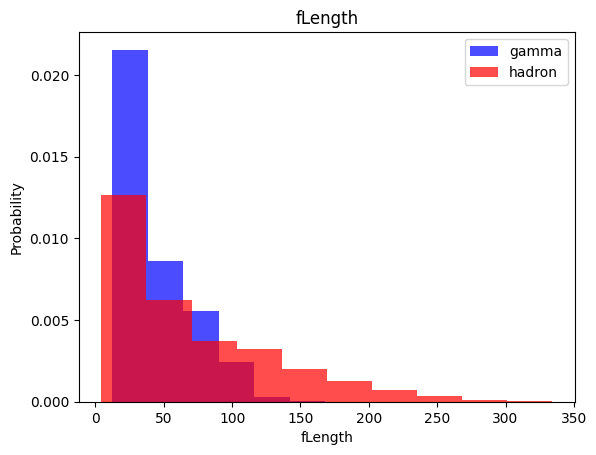

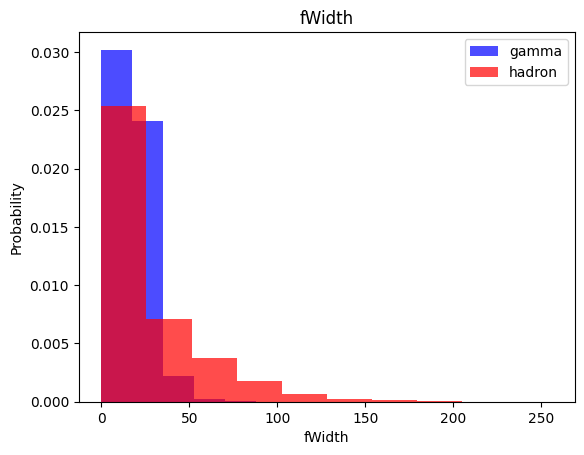

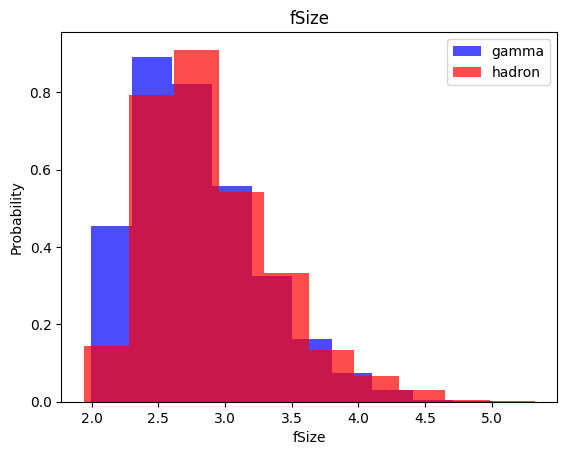

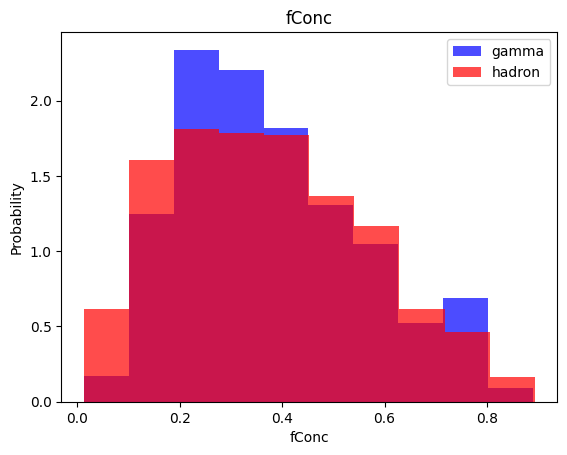

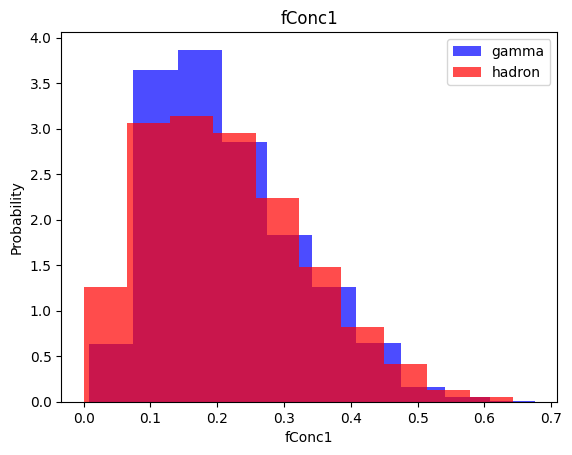

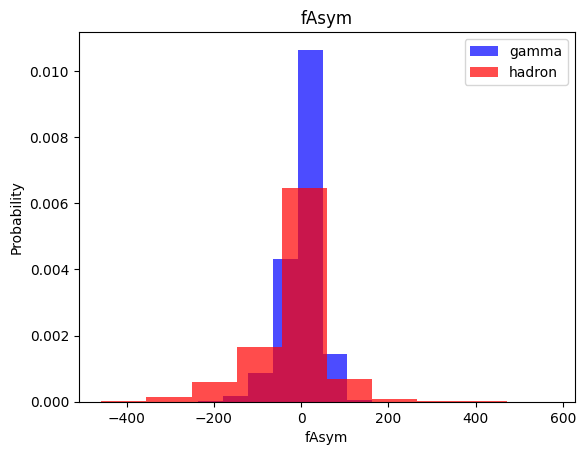

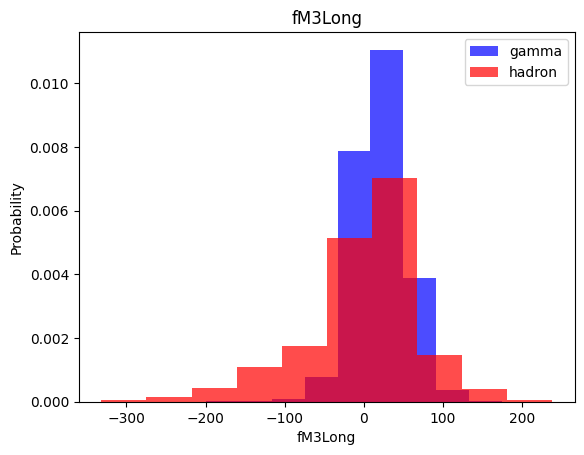

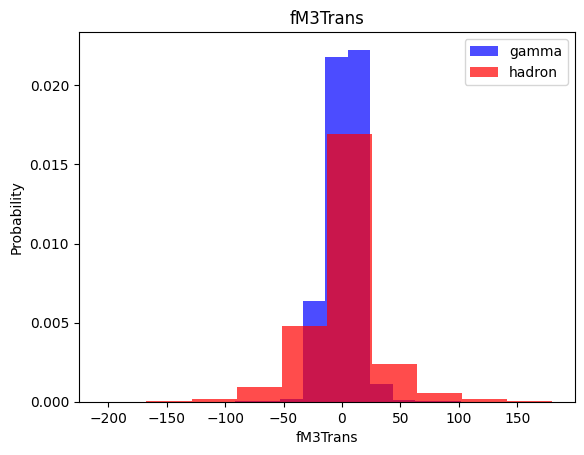

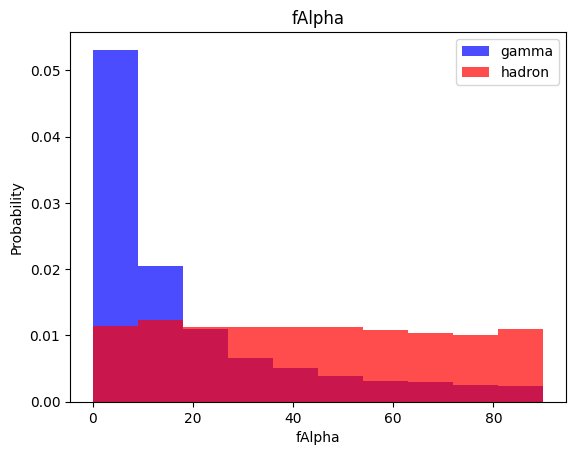

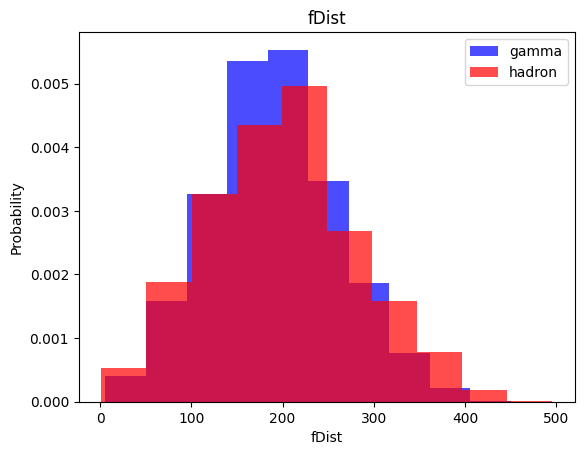

In [6]:
for label in header[:-1]:
    plt.hist(df[df['class'] == 0][label], color='blue', alpha=0.7, label='gamma', density=True)
    plt.hist(df[df['class'] == 1][label], color='red', alpha=0.7, label='hadron', density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend(loc='upper right')
    plt.show()

In [7]:
df = df.astype(float)
df['class'] = df['class'].astype(int)
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class         int64
dtype: object

## Train, Test and Valid Split
Splitting our DataFrame df into training, validation, and testing sets using NumPy. 

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

Defining a function named scale_dataset that performs data preprocessing using the StandardScaler from scikit-learn and, optionally, oversampling using the RandomOverSampler from the imblearn library.

In [9]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
    X = dataframe.drop(columns=['class'])
    y = dataframe['class']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y.values.reshape(-1, 1)))

    return data, X, y

In [10]:
train.value_counts('class')

class
0    7418
1    3994
Name: count, dtype: int64

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [12]:
print(len(y_train == 1))
print(len(y_train == 0))

14836
14836


In [13]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)

## K-Neighbour Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
print("KNN Accuracy: ", accuracy_score(y_test, knn_yhat))
print(classification_report(y_test, knn_yhat))

KNN Accuracy:  0.7806332236842105
              precision    recall  f1-score   support

           0       0.72      0.92      0.81      2432
           1       0.88      0.65      0.75      2432

    accuracy                           0.78      4864
   macro avg       0.80      0.78      0.78      4864
weighted avg       0.80      0.78      0.78      4864



The accuracy score of knn model is 0.78

## Support Vector Machines

In [16]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, svm_yhat))
print(classification_report(y_test, svm_yhat))

SVM Accuracy:  0.8423108552631579
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2432
           1       0.89      0.78      0.83      2432

    accuracy                           0.84      4864
   macro avg       0.85      0.84      0.84      4864
weighted avg       0.85      0.84      0.84      4864



The accuracy score of SVM model is 0.842

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# Evaluation
print("Accuracy score of Logistic Regression is: ", accuracy_score(y_test, lr_yhat))
print(classification_report(y_test, lr_yhat))

Accuracy score of Logistic Regression is:  0.7611019736842105
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2432
           1       0.80      0.70      0.75      2432

    accuracy                           0.76      4864
   macro avg       0.77      0.76      0.76      4864
weighted avg       0.77      0.76      0.76      4864



The accuracy of the model is: 0.76

## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_yhat = nb.predict(X_test)

print("Naive Bayes Accuracy: ", accuracy_score(y_test, nb_yhat))
print(classification_report(y_test, nb_yhat))

Naive Bayes Accuracy:  0.653577302631579
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      2432
           1       0.80      0.41      0.54      2432

    accuracy                           0.65      4864
   macro avg       0.70      0.65      0.63      4864
weighted avg       0.70      0.65      0.63      4864



The accuracy of the model is: 0.653

# Neural Network

We will now develop a neural network model for the classification problem.

In [20]:
import tensorflow as tf

2023-08-21 09:25:36.535356: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 09:25:38.362370: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 09:25:38.369334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 09:25:41.488292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Defining a function named plot_LA that is used to create a plot showing the training and validation loss (Binary Crossentropy) as well as the training and validation accuracy over the epochs of a model's training history.

In [21]:
def plot_LA(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

1. **create_model(num_nodes, dropout_rate)**:
    This function creates a neural network model for binary classification tasks. It takes two arguments: num_nodes, which determines the number of nodes in the hidden layers, and dropout_rate, which sets the dropout regularization rate. The model architecture consists of three layers: two hidden layers with num_nodes nodes and ReLU activation functions, each followed by a dropout layer to prevent overfitting, and an output layer with a sigmoid activation function for binary classification. The model is returned.

2. **train_model(model, train_dataset, valid_dataset, lr, epochs)**:
    This function trains the provided neural network model using the given datasets and parameters. The model parameter is the model created using the create_model function. The train_dataset and valid_dataset are the training and validation datasets, respectively. lr specifies the learning rate for the optimizer, and epochs determines the number of training epochs. The function compiles the model using the Adam optimizer, binary cross-entropy loss, and accuracy metric. It uses the EarlyStopping callback with a patience of 10 to monitor validation loss and restore the best weights if necessary. The model is trained using the training dataset, validated on the validation dataset, and the training history is returned alongside the trained model.

These functions work together to define a neural network model architecture and train it on provided datasets using TensorFlow and Keras. The create_model function establishes the architecture, and the train_model function compiles, trains, and returns the trained model along with its training history.

In [24]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def create_model(num_nodes, dropout_rate):
    model = tf.keras.Sequential([
        Dense(num_nodes, activation='relu', input_shape=(10,), kernel_initializer='glorot_uniform'),
        Dropout(dropout_rate),
        Dense(num_nodes, activation='relu', kernel_initializer='glorot_uniform'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_model(model, train_dataset, valid_dataset, lr, epochs):
    optimizer = Adam(lr, amsgrad=False)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=epochs,
        callbacks=[early_stopping],
        verbose=0
    )

    return model, history

1.  `epochs = 100`: This sets the number of training epochs for each model configuration.

2.  `batch_size = 64`: This determines the batch size used for training and validation datasets.

3.  Creating Train and Validation Datasets:

    -   `train_dataset` is created from the training data `(X_train, y_train)` using `tf.data.Dataset.from_tensor_slices()`. The data is shuffled and batched with prefetching for optimization.
    -   `valid_dataset` is created from the validation data `(X_valid, y_valid)` using batching and prefetching as well.
4.  Initializing Variables:

    -   `least_val_loss` is set to a high initial value (`float('inf')`) to track the lowest validation loss observed.
    -   `least_loss_model` is initially set to `None` and will store the model with the lowest validation loss.
5.  Nested Loop for Hyperparameter Search:

    -   There are three nested loops, iterating over different values for `num_nodes`, `dropout_rate`, and `lr` (learning rate).
    -   For each combination of hyperparameters, a message indicating the current configuration is printed.
    -   The neural network model is created using `create_model()` with the specified `num_nodes` and `dropout_rate`.
    -   The model is trained using `train_model()` with the specified hyperparameters and training/validation datasets.
    -   The training history is plotted using the `plot_LA()` function.
    -   Validation loss is evaluated on the validation dataset.
6.  Updating the Best Model:

    -   If the current validation loss (`val_loss[0]`) is smaller than `least_val_loss`, the `least_val_loss` is updated, and the current model becomes the `least_loss_model`.

The code essentially performs a grid search over different combinations of hyperparameters (`num_nodes`, `dropout_rate`, and `lr`) for training a neural network model. It tracks the model with the lowest validation loss and provides insights into the training process through printed messages and training history plots. The ultimate goal is to find the model configuration that yields the best validation performance.

2023-08-21 09:25:44.071059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error



 ====== 16 nodes, dropout_prob: 0.0, lr: 0.01, batch_size: 64 ======


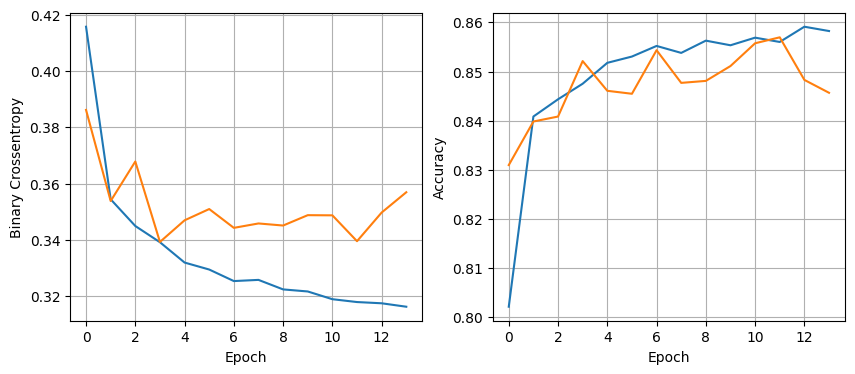


 ====== 16 nodes, dropout_prob: 0.0, lr: 0.005, batch_size: 64 ======


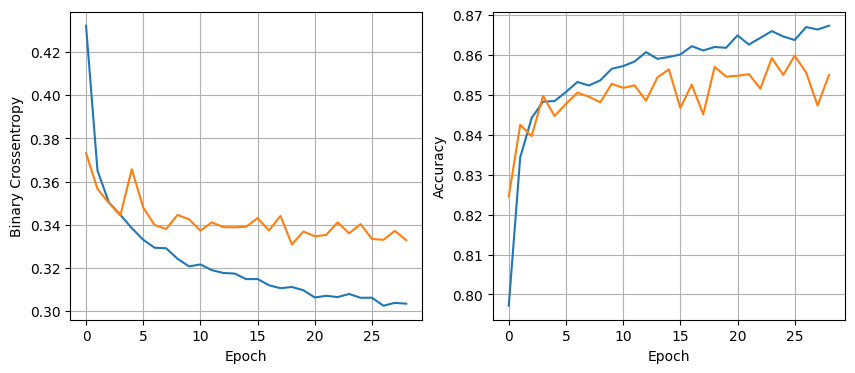


 ====== 16 nodes, dropout_prob: 0.0, lr: 0.001, batch_size: 64 ======


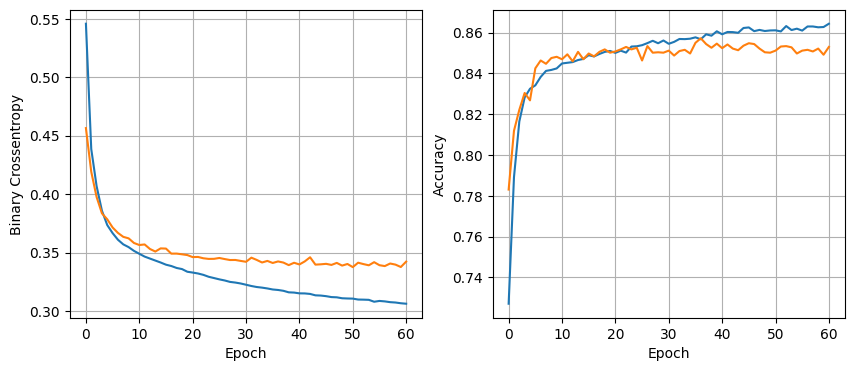


 ====== 16 nodes, dropout_prob: 0.2, lr: 0.01, batch_size: 64 ======


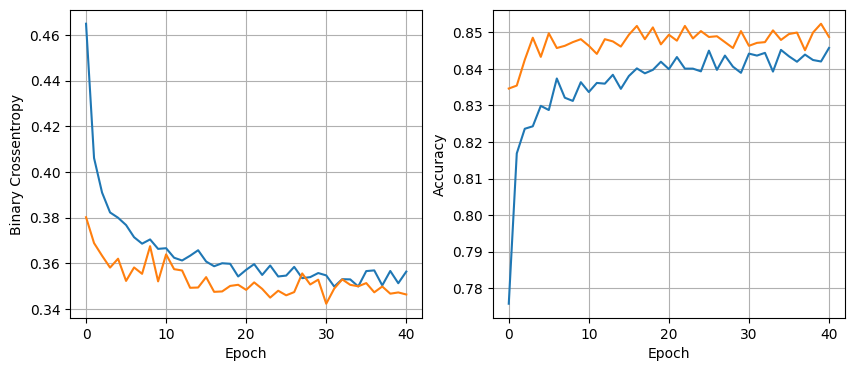


 ====== 16 nodes, dropout_prob: 0.2, lr: 0.005, batch_size: 64 ======


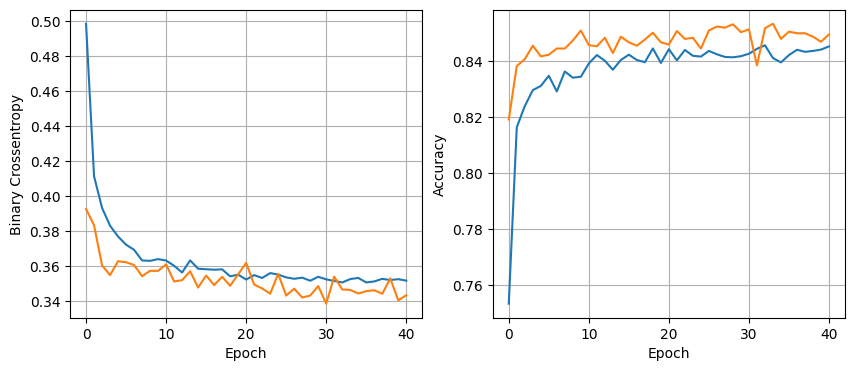


 ====== 16 nodes, dropout_prob: 0.2, lr: 0.001, batch_size: 64 ======


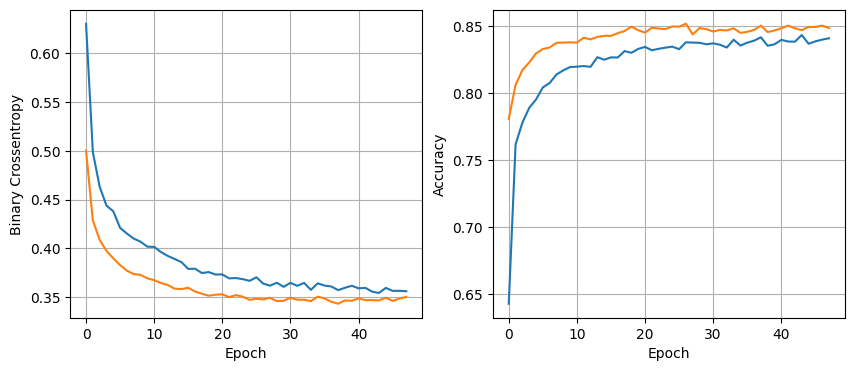


 ====== 32 nodes, dropout_prob: 0.0, lr: 0.01, batch_size: 64 ======


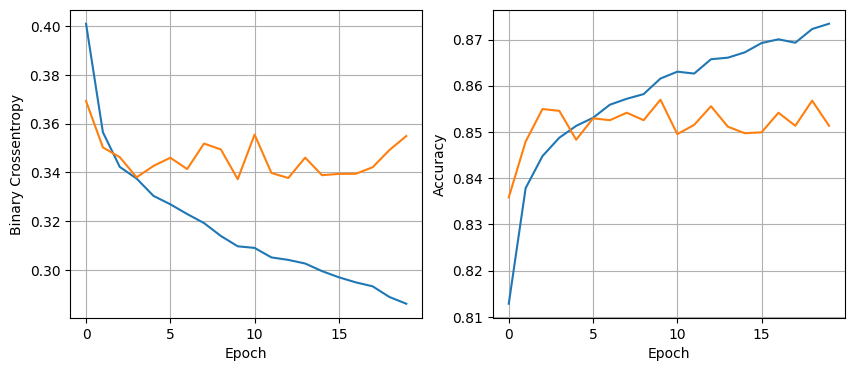


 ====== 32 nodes, dropout_prob: 0.0, lr: 0.005, batch_size: 64 ======


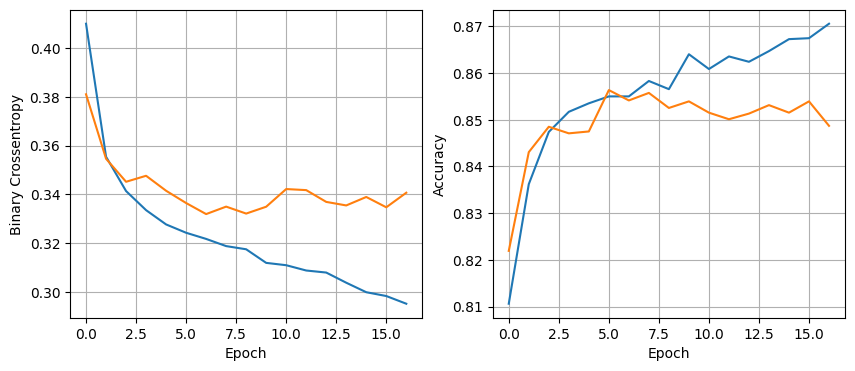


 ====== 32 nodes, dropout_prob: 0.0, lr: 0.001, batch_size: 64 ======


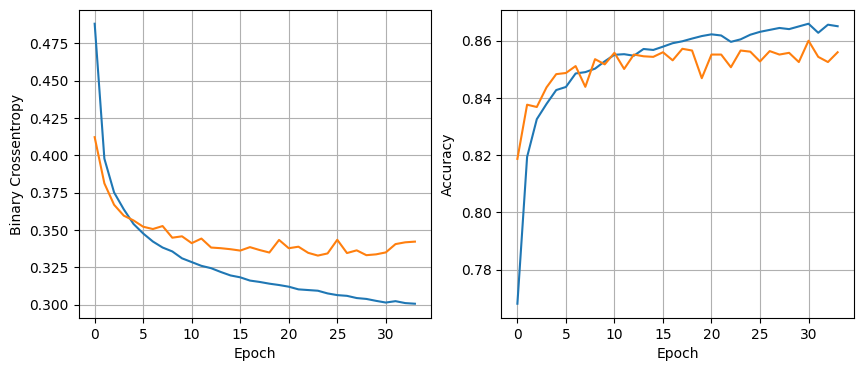


 ====== 32 nodes, dropout_prob: 0.2, lr: 0.01, batch_size: 64 ======


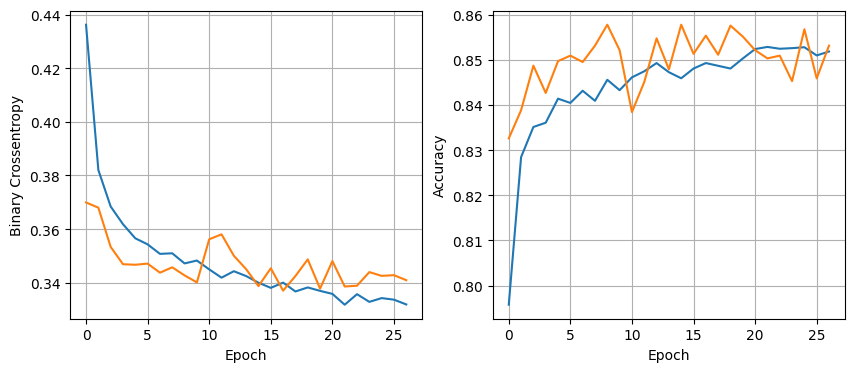


 ====== 32 nodes, dropout_prob: 0.2, lr: 0.005, batch_size: 64 ======


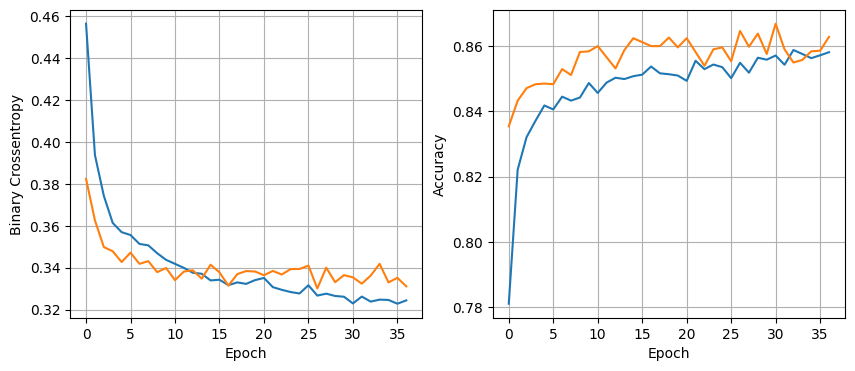


 ====== 32 nodes, dropout_prob: 0.2, lr: 0.001, batch_size: 64 ======


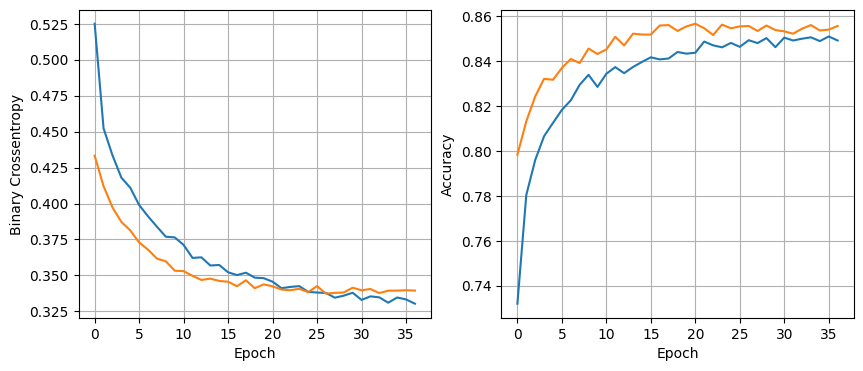


 ====== 64 nodes, dropout_prob: 0.0, lr: 0.01, batch_size: 64 ======


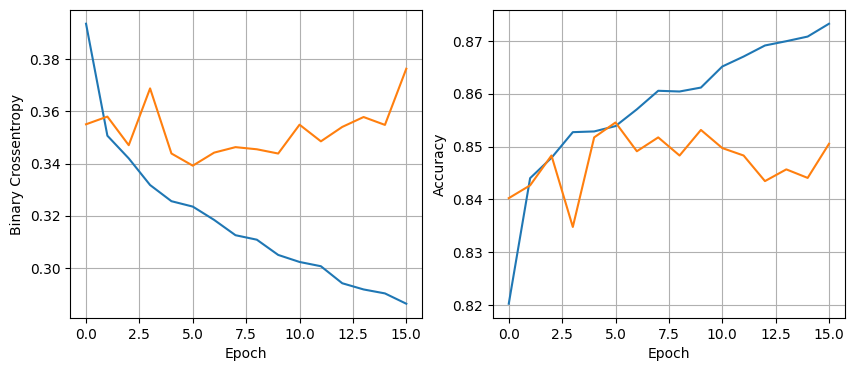


 ====== 64 nodes, dropout_prob: 0.0, lr: 0.005, batch_size: 64 ======


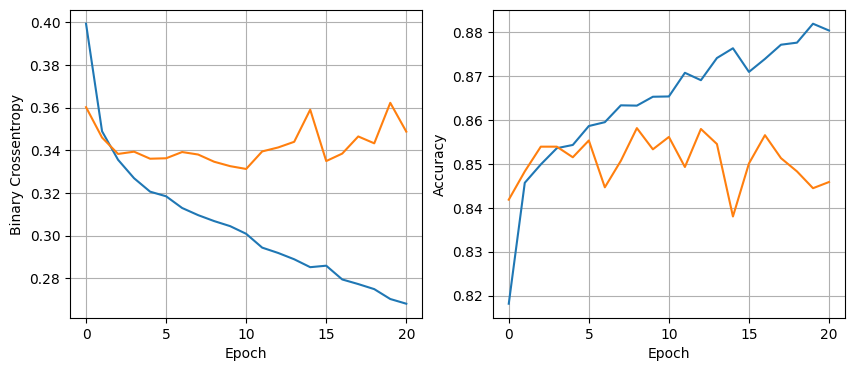


 ====== 64 nodes, dropout_prob: 0.0, lr: 0.001, batch_size: 64 ======


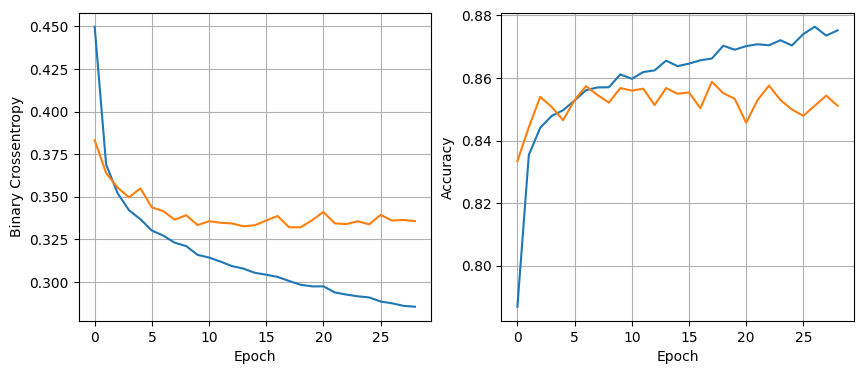


 ====== 64 nodes, dropout_prob: 0.2, lr: 0.01, batch_size: 64 ======


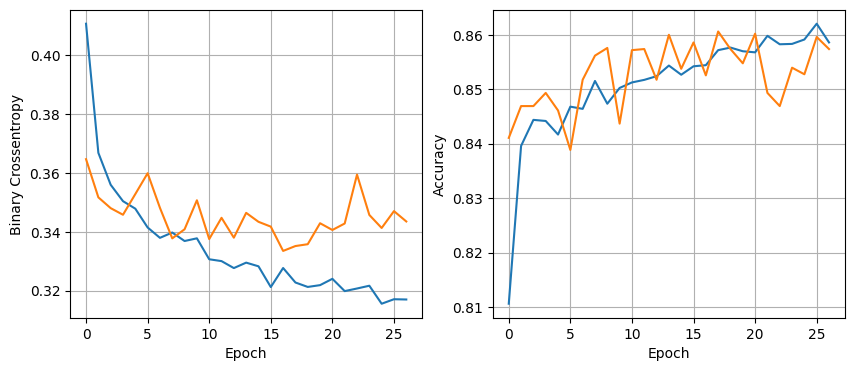


 ====== 64 nodes, dropout_prob: 0.2, lr: 0.005, batch_size: 64 ======


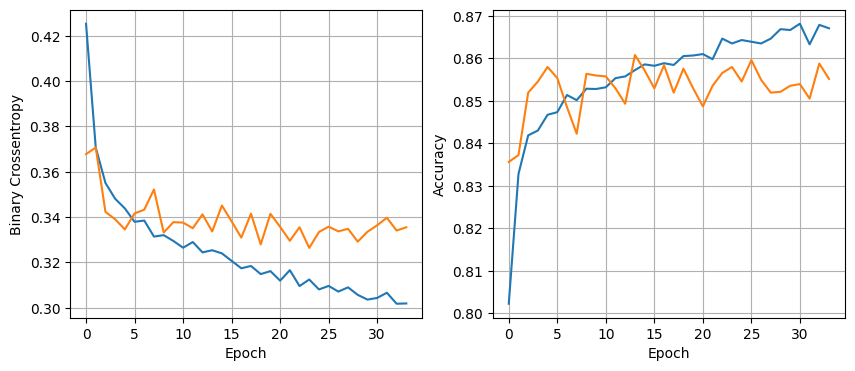


 ====== 64 nodes, dropout_prob: 0.2, lr: 0.001, batch_size: 64 ======


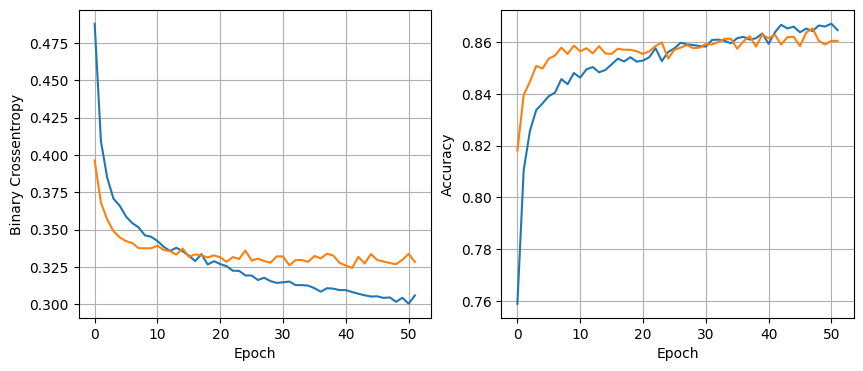

In [25]:
epochs = 100

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [16, 32, 64]:
  for dropout_rate in [0.0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      print(f'\n ====== {num_nodes} nodes, dropout_prob: {dropout_rate}, lr: {lr}, batch_size: {batch_size} ======')
      model = create_model(num_nodes, dropout_rate)
      model, history = train_model(model, train_dataset, valid_dataset, lr, epochs)
      plot_LA(history)

      val_loss = model.evaluate(valid_dataset, verbose=0)
      if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model

The trained neural network model (least_loss_model) to make predictions on the test data. After obtaining the raw predictions, we are post-processing them to convert them into binary class labels using a threshold of 0.5.

In [26]:
nn_yhat = least_loss_model.predict(X_test)
nn_yhat = (nn_yhat > 0.5).astype(int).reshape(-1,)


152/152 [==============================] - 0s 2ms/step


In [43]:
print(f'Accuracy: {accuracy_score(y_test, nn_yhat)}')
print(classification_report(y_test, nn_yhat))

Accuracy: 0.8490953947368421
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2432
           1       0.88      0.81      0.84      2432

    accuracy                           0.85      4864
   macro avg       0.85      0.85      0.85      4864
weighted avg       0.85      0.85      0.85      4864



The accuracy of the model is: 0.85

## Comparing Accuracy scores of different models

using the Seaborn library to create a bar plot comparing the accuracy of different models on a test dataset. It visualizes the performance of various machine learning models.

<Figure size 1000x1400 with 0 Axes>

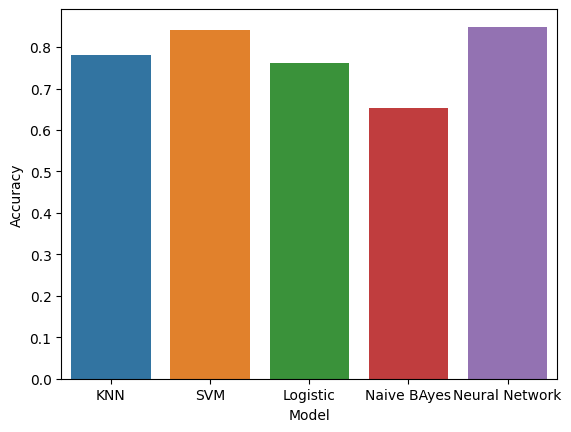

In [39]:

import seaborn as sns

# plot a barplot to compare the accuracy of each model
accuracy = pd.DataFrame(
    {'Model': ['KNN', 'SVM', 'Logistic', 'Naive BAyes', 'Neural Network'],
     'Accuracy': [accuracy_score(y_test, knn_yhat), accuracy_score(y_test, svm_yhat), accuracy_score(y_test, lr_yhat), accuracy_score(y_test, nb_yhat), accuracy_score(y_test, nn_yhat)]}
)
sns.barplot(x='Model', y='Accuracy', data=accuracy)
plt.Figure(figsize=(10, 14))

## Conclusion

The Neural network has the highest accuracy score of 85 and the support vector machine has the second highest score of 84. The neural network is the best model for this data set.